In [1]:
# %matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from skimage import data, io, filters
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import sobel, median
from skimage.morphology import watershed
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, disk
from skimage.color import label2rgb, rgb2gray
import cv2
from scipy.misc import imread, imshow
from scipy.ndimage import label
from scipy import asarray, ones, vstack, hstack
from sys import stdout
import argparse
import os
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
maindir1 = '/Volumes/RATI_2TB/work2017/InfectionImaging/2017.04.04 N2 PA14 pAA100 to PA14 WT or alternates SKmedia UVkilled PA14 and rl2244/PA14 WT and SK/18 hrs/Merged.stitch'
maindir2 = '/Volumes/RATI_2TB/work2017/InfectionImaging/2017.04.04 N2 PA14 pAA100 to PA14 WT or alternates SKmedia UVkilled PA14 and rl2244/PA14 WT and SK/19 hrs/Merged.stitch'
maindir3 = '/Volumes/RATI_2TB/work2017/InfectionImaging/2017.04.04 N2 PA14 pAA100 to PA14 WT or alternates SKmedia UVkilled PA14 and rl2244/PA14 WT and UVkilled PA14 WT/18 hrs/Merged.stitch'
maindir4 = '/Volumes/RATI_2TB/work2017/InfectionImaging/2017.04.04 N2 PA14 pAA100 to PA14 WT or alternates SKmedia UVkilled PA14 and rl2244/PA14 WT and UVkilled PA14 WT/19 hrs/Merged.stitch'
maindir5 = '/Volumes/RATI_2TB/work2017/InfectionImaging/2017.04.04 N2 PA14 pAA100 to PA14 WT or alternates SKmedia UVkilled PA14 and rl2244/PA14 WT and RL2244/18 hrs/Merged.stitch'
maindir6 = '/Volumes/RATI_2TB/work2017/InfectionImaging/2017.04.04 N2 PA14 pAA100 to PA14 WT or alternates SKmedia UVkilled PA14 and rl2244/PA14 WT and RL2244/19 hrs/Merged.stitch'

meansRFprev1 = pickle.load(open( os.path.join(maindir1,"meansRFprev.p"), "rb" ) )
intsRFprev1 = pickle.load(open( os.path.join(maindir1,"intsRFprev.p"), 'rb') )
timeprev1 = pickle.load(open( os.path.join(maindir1,"timeprev.p"), "rb" ) )
meansRF2 = pickle.load(open( os.path.join(maindir2,"meansRF.p"), "rb" ) )
intsRF2 = pickle.load(open( os.path.join(maindir2,"intsRF.p"), 'rb') )
time2 = pickle.load(open( os.path.join(maindir2,"time.p"), "rb" ) )
meansRFprevAbs1 = pickle.load(open( os.path.join(maindir1,"meansRFprevAbs.p"), "rb" ) )
intsRFprevAbs1 = pickle.load(open( os.path.join(maindir1,"intsRFprevAbs.p"), 'rb') )
meansRFAbs2 = pickle.load(open( os.path.join(maindir2,"meansRFAbs.p"), "rb" ) )
intsRFAbs2 = pickle.load(open( os.path.join(maindir2,"intsRFAbs.p"), 'rb') )

meansRFprev3 = pickle.load(open( os.path.join(maindir3,"meansRFprev.p"), "rb" ) )
intsRFprev3 = pickle.load(open( os.path.join(maindir3,"intsRFprev.p"), 'rb') )
timeprev3 = pickle.load(open( os.path.join(maindir3,"timeprev.p"), "rb" ) )
meansRF4 = pickle.load(open( os.path.join(maindir4,"meansRF.p"), "rb" ) )
intsRF4 = pickle.load(open( os.path.join(maindir4,"intsRF.p"), 'rb') )
time4 = pickle.load(open( os.path.join(maindir4,"time.p"), "rb" ) )
meansRFprevAbs3 = pickle.load(open( os.path.join(maindir3,"meansRFprevAbs.p"), "rb" ) )
intsRFprevAbs3 = pickle.load(open( os.path.join(maindir3,"intsRFprevAbs.p"), 'rb') )
meansRFAbs4 = pickle.load(open( os.path.join(maindir4,"meansRFAbs.p"), "rb" ) )
intsRFAbs4 = pickle.load(open( os.path.join(maindir4,"intsRFAbs.p"), 'rb') )

meansRFprev5 = pickle.load(open( os.path.join(maindir5,"meansRFprev.p"), "rb" ) )
intsRFprev5 = pickle.load(open( os.path.join(maindir5,"intsRFprev.p"), 'rb') )
timeprev5 = pickle.load(open( os.path.join(maindir5,"timeprev.p"), "rb" ) )
meansRF6 = pickle.load(open( os.path.join(maindir6,"meansRF.p"), "rb" ) )
intsRF6 = pickle.load(open( os.path.join(maindir6,"intsRF.p"), 'rb') )
time6 = pickle.load(open( os.path.join(maindir6,"time.p"), "rb" ) )
meansRFprevAbs5 = pickle.load(open( os.path.join(maindir5,"meansRFprevAbs.p"), "rb" ) )
intsRFprevAbs5 = pickle.load(open( os.path.join(maindir5,"intsRFprevAbs.p"), 'rb') )
meansRFAbs6 = pickle.load(open( os.path.join(maindir6,"meansRFAbs.p"), "rb" ) )
intsRFAbs6 = pickle.load(open( os.path.join(maindir6,"intsRFAbs.p"), 'rb') )

In [3]:
timeprev10 = [int(t)-(int(timeprev1[-1])+10) for t in timeprev1]
timeprev30 = [int(t)-(int(timeprev3[-1])+10) for t in timeprev3]
timeprev50 = [int(t)-(int(timeprev5[-1])+10) for t in timeprev5]

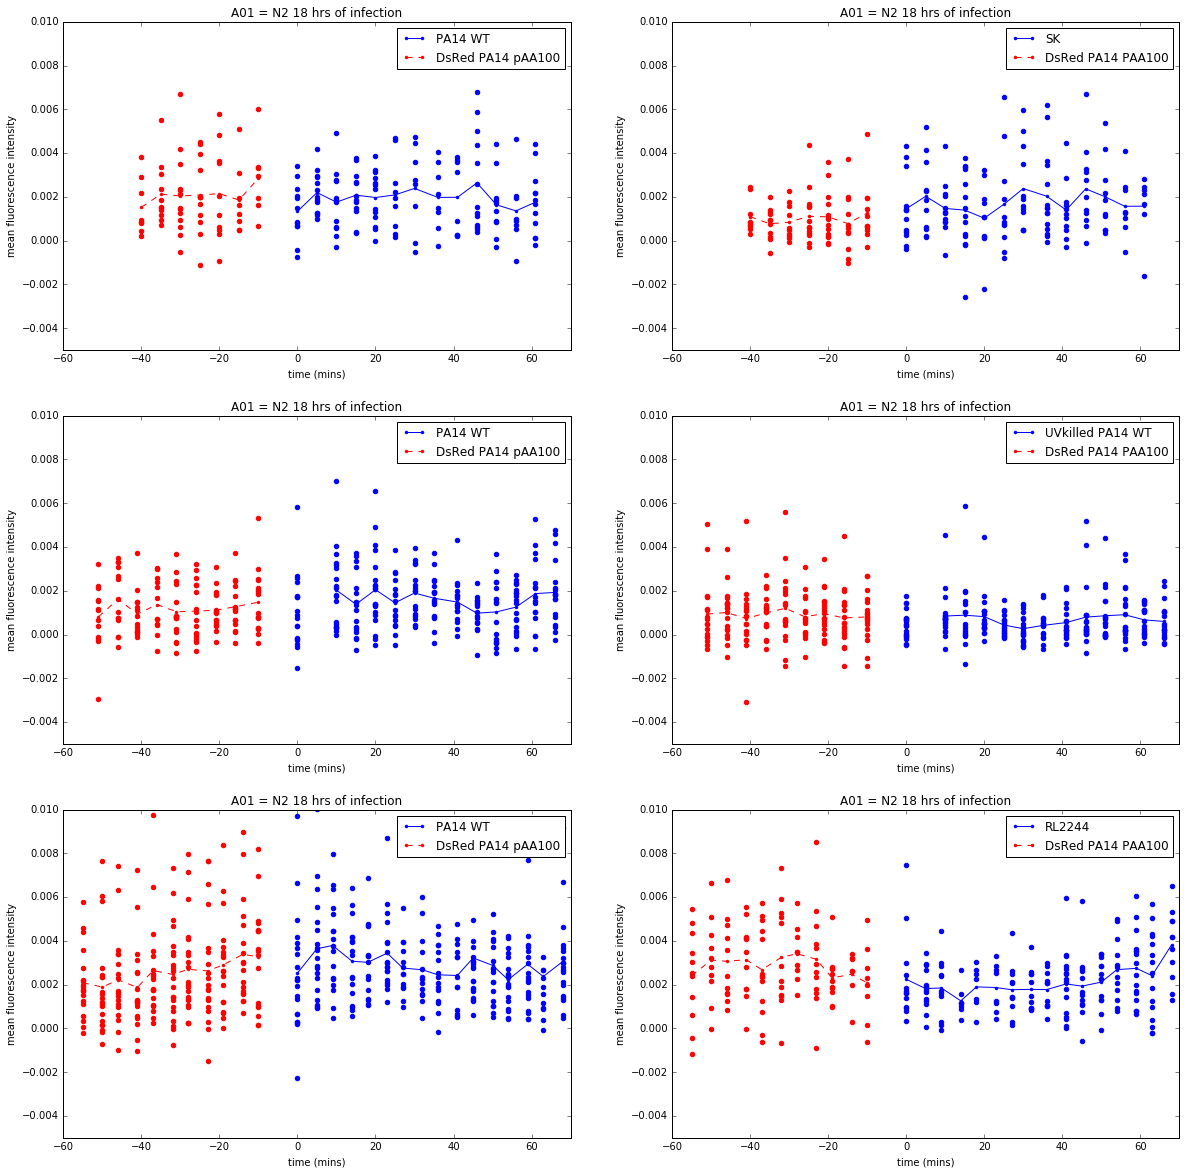

In [6]:
plt.figure(1, figsize = (20,20))
plt.subplot(321)
trange0 = len(timeprev10)
trange = len(time2)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprev1[0,j]))
for t, RF in zip(timeprev10, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRF2[0,j]))
for t, RF in zip(time2, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time2[:trange], meansRF2[0,:trange].T, 'b.-', label = 'PA14 WT')
plt.plot(timeprev10[:trange0], meansRFprev1[0,:].T, 'r.--', label = 'DsRed PA14 pAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(-0.005, 0.010)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(322)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprev1[1,j]))
for t, RF in zip(timeprev10, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRF2[1,j]))
for t, RF in zip(time2, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time2[:trange], meansRF2[1,:trange].T, 'b.-', label = 'SK')
plt.plot(timeprev10[:trange0], meansRFprev1[1,:].T, 'r.--', label = 'DsRed PA14 PAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(-0.005, 0.010)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(323)
trange0 = len(timeprev30)
trange = len(time4)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprev3[0,j]))
for t, RF in zip(timeprev30, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRF4[0,j]))
for t, RF in zip(time4, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time4[:trange], meansRF4[0,:trange].T, 'b.-', label = 'PA14 WT')
plt.plot(timeprev30[:trange0], meansRFprev3[0,:].T, 'r.--', label = 'DsRed PA14 pAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(-0.005, 0.010)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(324)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprev3[1,j]))
for t, RF in zip(timeprev30, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRF4[1,j]))
for t, RF in zip(time4, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time4[:trange], meansRF4[1,:36].T, 'b.-', label = 'UVkilled PA14 WT')
plt.plot(timeprev30[:trange0], meansRFprev3[1,:].T, 'r.--', label = 'DsRed PA14 PAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(-0.005, 0.010)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(325)
trange0 = len(timeprev50)
trange = len(time6)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprev5[0,j]))
for t, RF in zip(timeprev50, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRF6[0,j]))
for t, RF in zip(time6, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time6[:trange], meansRF6[0,:trange].T, 'b.-', label = 'PA14 WT')
plt.plot(timeprev50[:trange0], meansRFprev5[0,:].T, 'r.--', label = 'DsRed PA14 pAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(-0.005, 0.010)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(326)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprev5[1,j]))
for t, RF in zip(timeprev50, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRF6[1,j]))
for t, RF in zip(time6, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time6[:trange], meansRF6[1,:36].T, 'b.-', label = 'RL2244')
plt.plot(timeprev50[:trange0], meansRFprev5[1,:].T, 'r.--', label = 'DsRed PA14 PAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(-0.005, 0.010)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

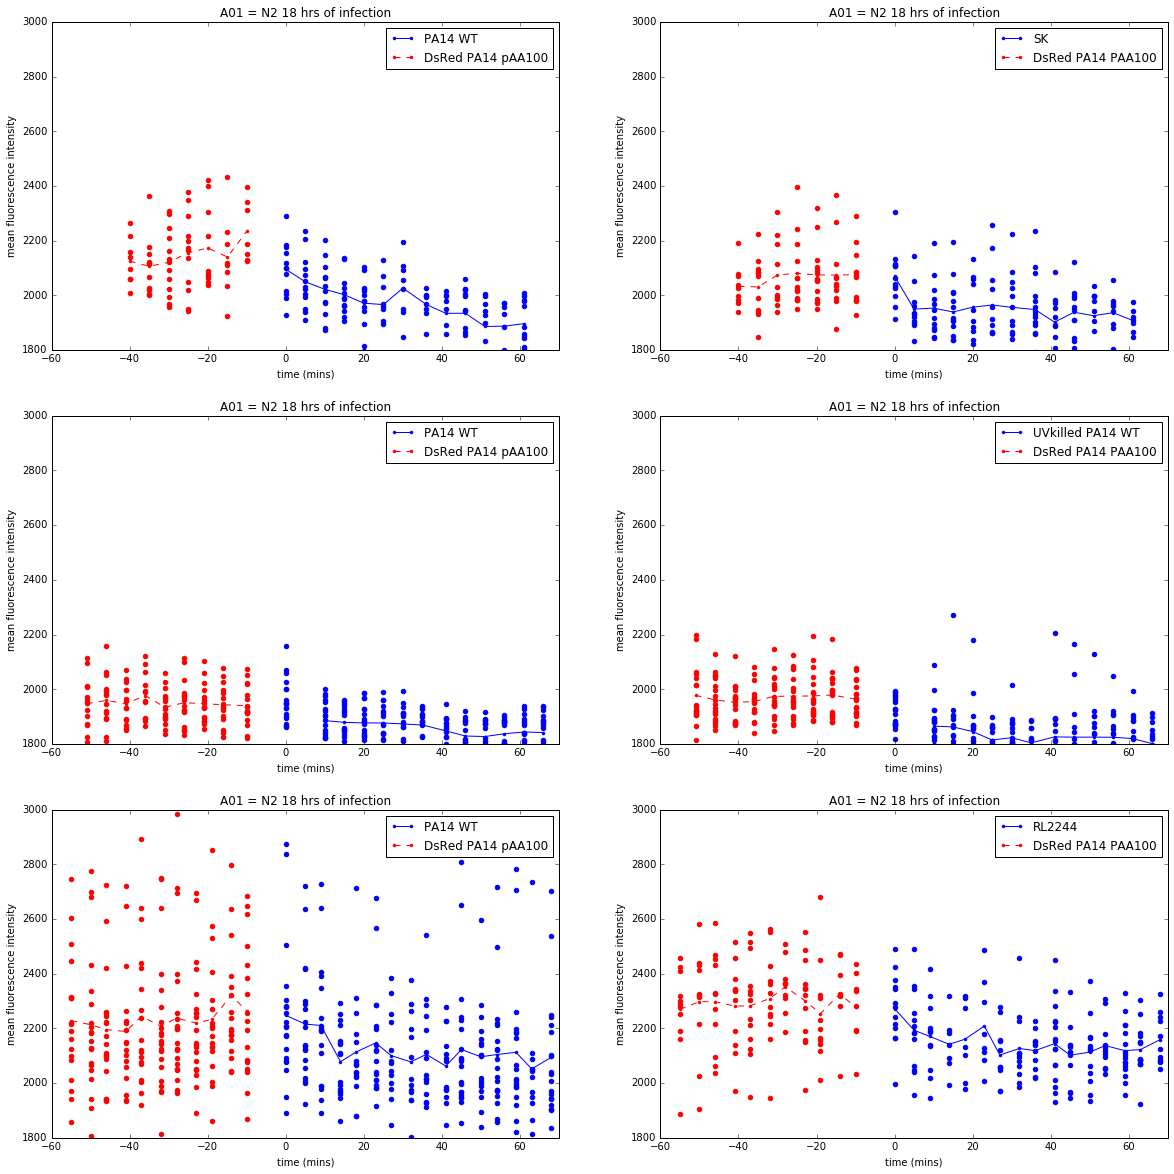

In [7]:
plt.figure(1, figsize = (20,20))
plt.subplot(321)
trange0 = len(timeprev10)
trange = len(time2)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprevAbs1[0,j]))
for t, RF in zip(timeprev10, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRFAbs2[0,j]))
for t, RF in zip(time2, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time2[:trange], meansRFAbs2[0,:trange].T, 'b.-', label = 'PA14 WT')
plt.plot(timeprev10[:trange0], meansRFprevAbs1[0,:].T, 'r.--', label = 'DsRed PA14 pAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(1800, 3000)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(322)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprevAbs1[1,j]))
for t, RF in zip(timeprev10, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRFAbs2[1,j]))
for t, RF in zip(time2, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time2[:trange], meansRFAbs2[1,:trange].T, 'b.-', label = 'SK')
plt.plot(timeprev10[:trange0], meansRFprevAbs1[1,:].T, 'r.--', label = 'DsRed PA14 PAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(1800, 3000)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(323)
trange0 = len(timeprev30)
trange = len(time4)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprevAbs3[0,j]))
for t, RF in zip(timeprev30, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRFAbs4[0,j]))
for t, RF in zip(time4, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time4[:trange], meansRFAbs4[0,:trange].T, 'b.-', label = 'PA14 WT')
plt.plot(timeprev30[:trange0], meansRFprevAbs3[0,:].T, 'r.--', label = 'DsRed PA14 pAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(1800, 3000)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(324)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprevAbs3[1,j]))
for t, RF in zip(timeprev30, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRFAbs4[1,j]))
for t, RF in zip(time4, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time4[:trange], meansRFAbs4[1,:36].T, 'b.-', label = 'UVkilled PA14 WT')
plt.plot(timeprev30[:trange0], meansRFprevAbs3[1,:].T, 'r.--', label = 'DsRed PA14 PAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(1800, 3000)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(325)
trange0 = len(timeprev50)
trange = len(time6)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprevAbs5[0,j]))
for t, RF in zip(timeprev50, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRFAbs6[0,j]))
for t, RF in zip(time6, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time6[:trange], meansRFAbs6[0,:trange].T, 'b.-', label = 'PA14 WT')
plt.plot(timeprev50[:trange0], meansRFprevAbs5[0,:].T, 'r.--', label = 'DsRed PA14 pAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(1800, 3000)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')

plt.subplot(326)
intsregRF = []
intsregRFprev = []
for j in range(0,trange0):
    intsregRFprev.append((intsRFprevAbs5[1,j]))
for t, RF in zip(timeprev50, intsregRFprev):
    plt.scatter([t] * len(RF), RF, color = 'red')
for j in range(0,trange):
    intsregRF.append((intsRFAbs6[1,j]))
for t, RF in zip(time6, intsregRF):
    plt.scatter([t] * len(RF), RF, color = 'blue')
plt.plot(time6[:trange], meansRFAbs6[1,:36].T, 'b.-', label = 'RL2244')
plt.plot(timeprev50[:trange0], meansRFprevAbs5[1,:].T, 'r.--', label = 'DsRed PA14 PAA100')
plt.legend()
plt.xlim(-60,70)
plt.ylim(1800, 3000)
plt.title('A01 = N2 18 hrs of infection')
plt.xlabel('time (mins)')
plt.ylabel('mean fluorescence intensity')